In [1]:
# Import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import pickle

In [4]:
# Read the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Cleansing

In [5]:
# Drop customerID column
df = df.drop('customerID',axis=1)

In [6]:
# Check dataset infomation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Based the dataset information, 'TotalCharges' data type was object, it should be numeric data

In [7]:
# Convert the TotalCharge feature data type into numeric data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [8]:
# Check the missing value
df.isnull().sum().sort_values(ascending=False)

TotalCharges        11
gender               0
SeniorCitizen        0
MonthlyCharges       0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
DeviceProtection     0
OnlineBackup         0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
tenure               0
Dependents           0
Partner              0
Churn                0
dtype: int64

In [9]:
# Check the duplicated data 
df.duplicated().sum()

22

In [10]:
df.shape

(7043, 20)

In [11]:
# Fill the missing values with Median of the Total Charges column
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [12]:
# Select the data that categorized as duplicated data
df[df.duplicated(keep=False)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
22,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
100,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
542,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
646,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
662,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
690,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
976,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1243,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,45.30,45.30,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes


In [14]:
# Remove the duplicated data
df = df.drop_duplicates(keep='first')
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Exploratory Data Analysis

<AxesSubplot:xlabel='Churn', ylabel='count'>

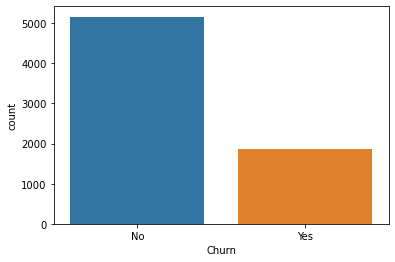

In [15]:
# Countplot of Churn column
sns.countplot(data=df,x='Churn')

<AxesSubplot:xlabel='gender', ylabel='count'>

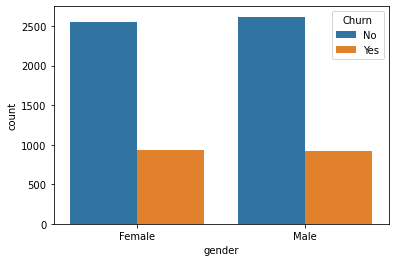

In [16]:
sns.countplot(data=df,x='gender',hue='Churn')

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

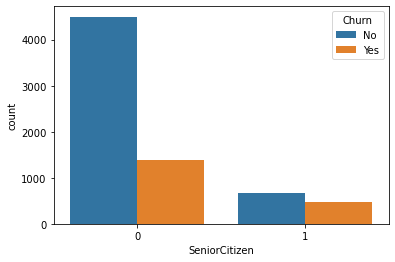

In [17]:
sns.countplot(data=df,x='SeniorCitizen',hue='Churn')

<AxesSubplot:xlabel='Partner', ylabel='count'>

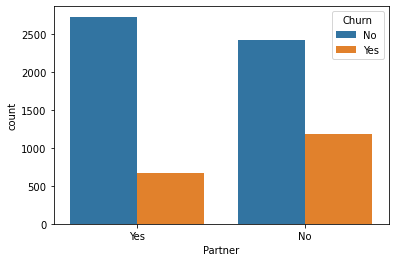

In [18]:
sns.countplot(data=df,x='Partner',hue='Churn')

<AxesSubplot:xlabel='Dependents', ylabel='count'>

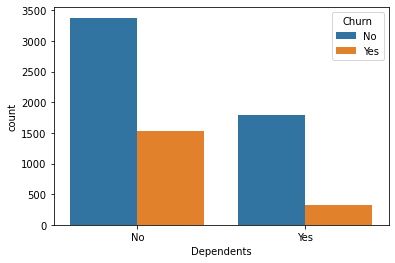

In [19]:
sns.countplot(data=df,x='Dependents',hue='Churn')

<AxesSubplot:xlabel='tenure', ylabel='Count'>

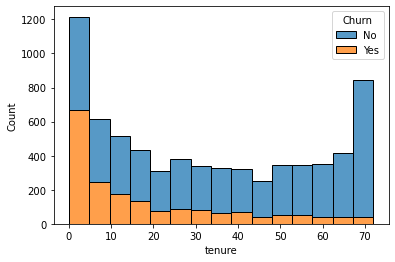

In [20]:
sns.histplot(data=df,x='tenure',hue='Churn',multiple="stack")

In [21]:
df[['Churn','tenure']].groupby('Churn').mean()

,tenure
Churn,
No,37.640782
Yes,18.088853


<AxesSubplot:xlabel='PhoneService', ylabel='count'>

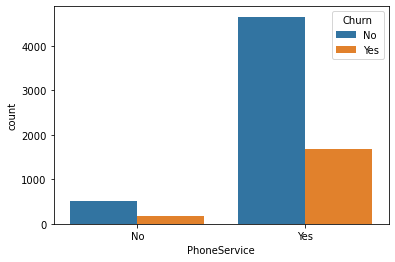

In [22]:
sns.countplot(data=df,x='PhoneService',hue='Churn')

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

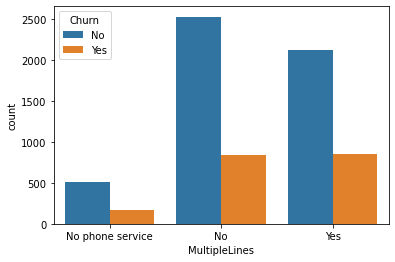

In [23]:
sns.countplot(data=df,x='MultipleLines',hue='Churn')

<AxesSubplot:xlabel='InternetService', ylabel='count'>

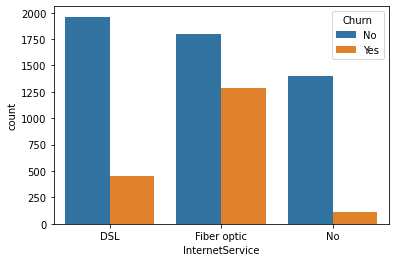

In [24]:
sns.countplot(data=df,x='InternetService',hue='Churn')

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

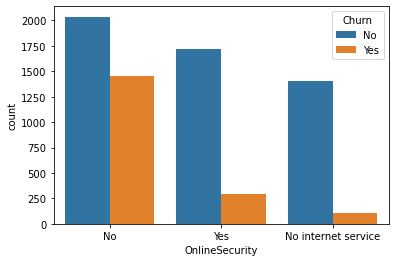

In [25]:
sns.countplot(data=df,x='OnlineSecurity',hue='Churn')

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

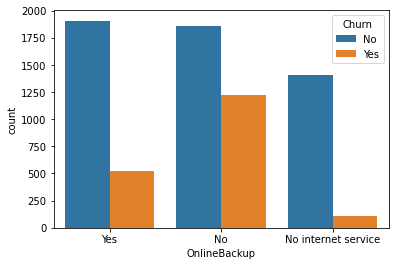

In [26]:
sns.countplot(data=df,x='OnlineBackup',hue='Churn')

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

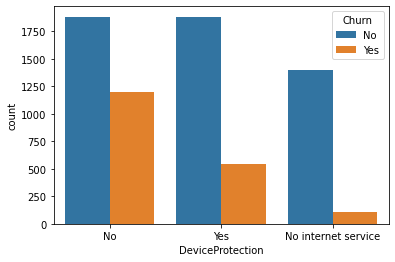

In [27]:
sns.countplot(data=df,x='DeviceProtection',hue='Churn')

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

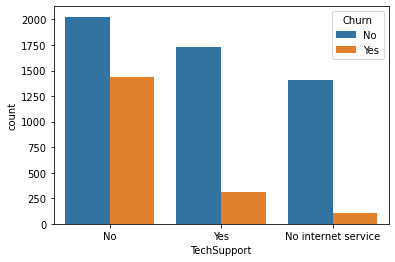

In [28]:
sns.countplot(data=df,x='TechSupport',hue='Churn')

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

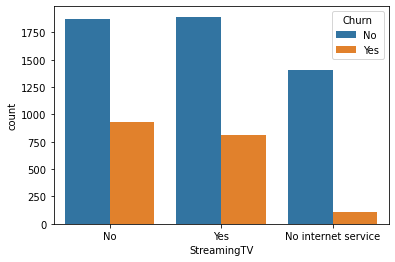

In [29]:
sns.countplot(data=df,x='StreamingTV',hue='Churn')

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

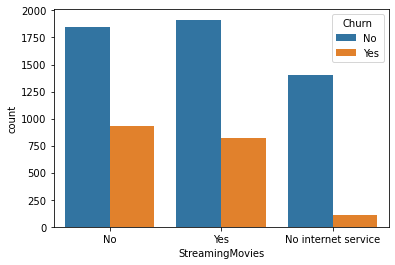

In [30]:
sns.countplot(data=df,x='StreamingMovies',hue='Churn')

<AxesSubplot:xlabel='Contract', ylabel='count'>

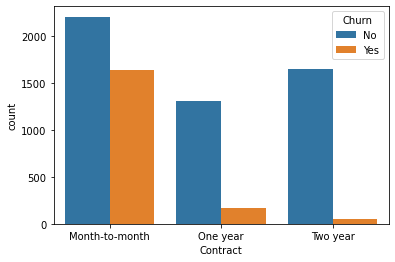

In [31]:
sns.countplot(data=df,x='Contract',hue='Churn')

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

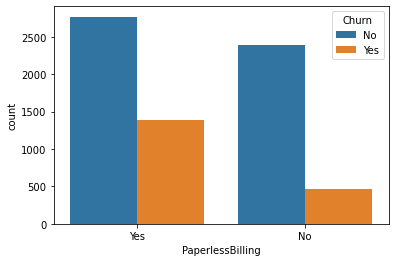

In [32]:
sns.countplot(data=df,x='PaperlessBilling',hue='Churn')

<AxesSubplot:xlabel='count', ylabel='PaymentMethod'>

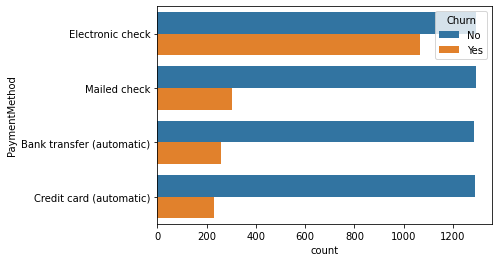

In [33]:
sns.countplot(data=df,y='PaymentMethod',hue='Churn')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

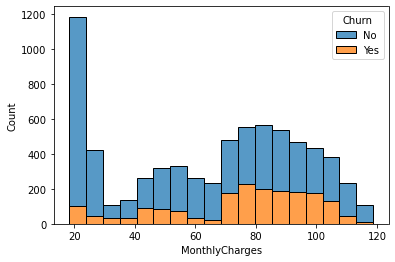

In [34]:
sns.histplot(data=df,x='MonthlyCharges',
             hue='Churn',
             multiple="stack")

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

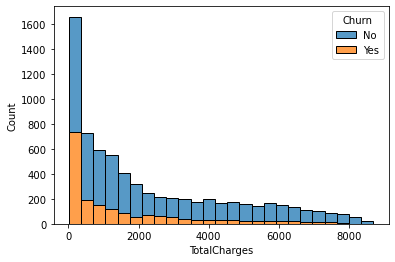

In [35]:
sns.histplot(data=df,x='TotalCharges',
             hue='Churn',
             multiple="stack")

In [36]:
df[['Churn','MonthlyCharges']].groupby('Churn').mean()

,MonthlyCharges
Churn,
No,61.344878
Yes,74.604308


In [37]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.162512,32.469449,64.851894,2288.954490
std,0.368947,24.534965,30.069001,2265.319449
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,411.150000
50%,0.000000,29.000000,70.400000,1400.550000
75%,0.000000,55.000000,89.900000,3801.700000
max,1.000000,72.000000,118.750000,8684.800000


## Feature Engineering

In [38]:
le = LabelEncoder()

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


for col in binary_cols:
    df = label_encoder(df, col)

In [39]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in df.columns if 30 >= df[col].nunique() > 2]
df = one_hot_encoder(df, ohe_cols)

In [40]:
cols = ['tenure','MonthlyCharges','TotalCharges']
scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])
df[cols].head()

,tenure,MonthlyCharges,TotalCharges
0,-1.282728,-1.164135,-0.997328
1,0.062387,-0.262811,-0.176347
2,-1.241967,-0.365914,-0.962760
3,0.510759,-0.750058,-0.197869
4,-1.241967,0.194503,-0.943556


In [41]:
X = df.drop('Churn',axis=1)
y = df['Churn']

## Model Building & Hyperparameter Tuning

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [43]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [44]:
knn = KNeighborsClassifier()
param_knn = {
    'n_neighbors': [2,10,100,1000]
}
grid_search1 = GridSearchCV(knn, param_knn, cv=5)
 
grid_search1.fit(X_train,y_train)
print(grid_search1.best_params_)

{'n_neighbors': 100}


In [45]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [46]:
tree_model = DecisionTreeClassifier() 
param_tree = {
    'max_depth': [None, 10, 20, 30, 40, 100, 1000],  # Depth of the tree
    'min_samples_split': [2, 5, 10, 100, 1000],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 10, 20, 100, 1000],  # Minimum samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider for the best split
}
grid_search2 = GridSearchCV(tree_model, param_tree, cv=5)
 
grid_search2.fit(X_train,y_train)
print(grid_search2.best_params_)

{'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 100, 'min_samples_split': 5}


## Model Evaluation

#### Logistic Regression

In [47]:
y_pred = lr.predict(X_test)
y_probs = lr.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1053
           1       0.60      0.54      0.57       352

    accuracy                           0.79      1405
   macro avg       0.72      0.71      0.72      1405
weighted avg       0.79      0.79      0.79      1405



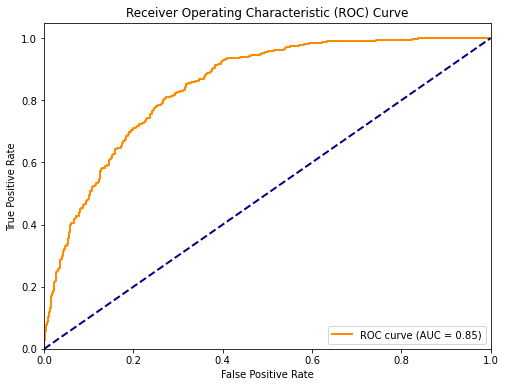

In [48]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

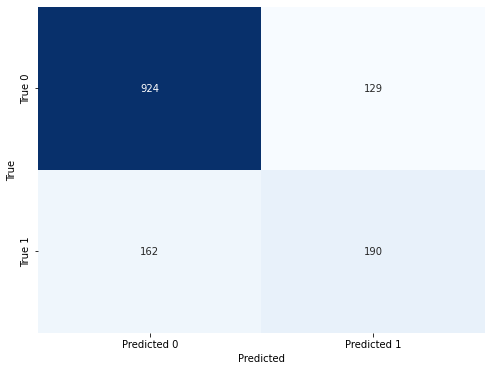

In [49]:
# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### KNN

In [50]:
y_pred = grid_search1.predict(X_test)
y_probs = grid_search1.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1053
           1       0.61      0.60      0.61       352

    accuracy                           0.81      1405
   macro avg       0.74      0.74      0.74      1405
weighted avg       0.80      0.81      0.81      1405



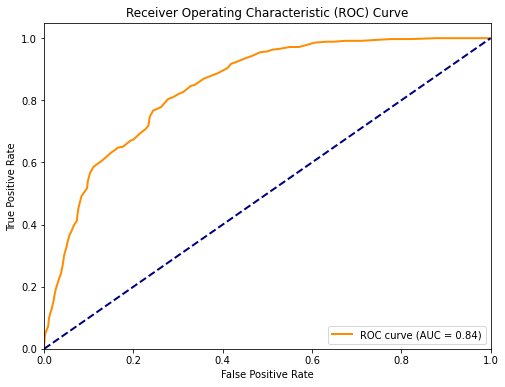

In [51]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

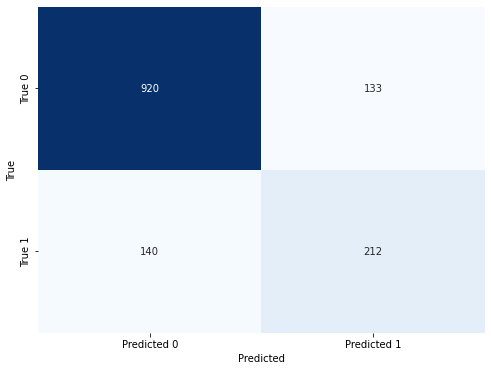

In [52]:
# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Gaussian Naive Bayes

In [53]:
y_pred = gnb.predict(X_test)
y_probs = gnb.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.57      0.71      1053
           1       0.41      0.89      0.57       352

    accuracy                           0.65      1405
   macro avg       0.68      0.73      0.64      1405
weighted avg       0.81      0.65      0.68      1405



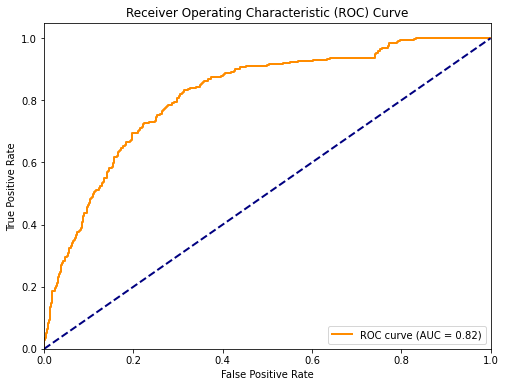

In [54]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

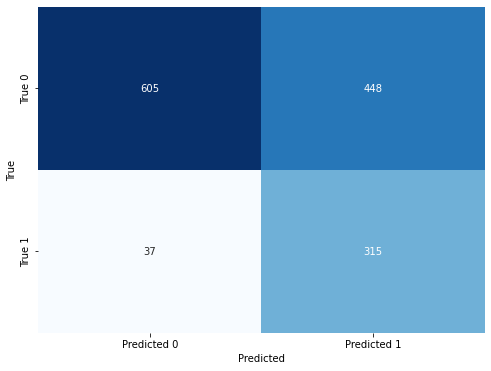

In [55]:
# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Decision Tree

In [56]:
y_pred = grid_search2.predict(X_test)
y_probs = grid_search2.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1053
           1       0.58      0.46      0.51       352

    accuracy                           0.78      1405
   macro avg       0.70      0.67      0.68      1405
weighted avg       0.77      0.78      0.77      1405



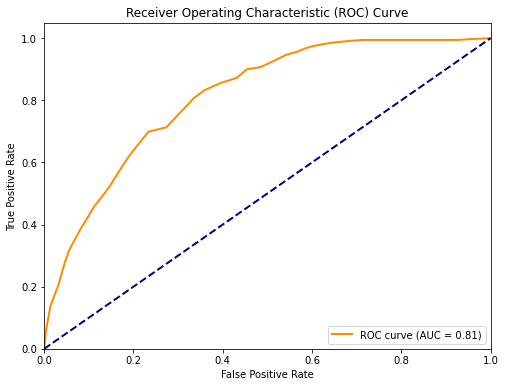

In [57]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

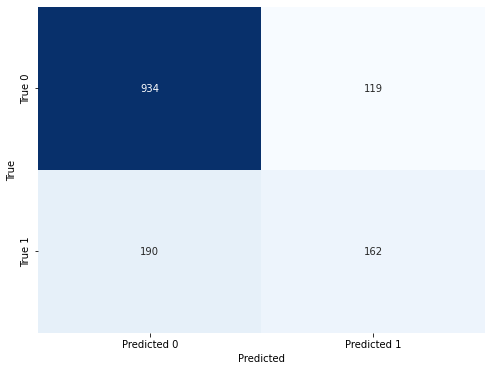

In [58]:
# Compute the confusion matrix
confusion = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [59]:
# Load the model from the pickle file
filename = 'finalized_model.h2'
pickle.dump(lr, open(filename, 'wb'))